In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('breast-cancer.csv')

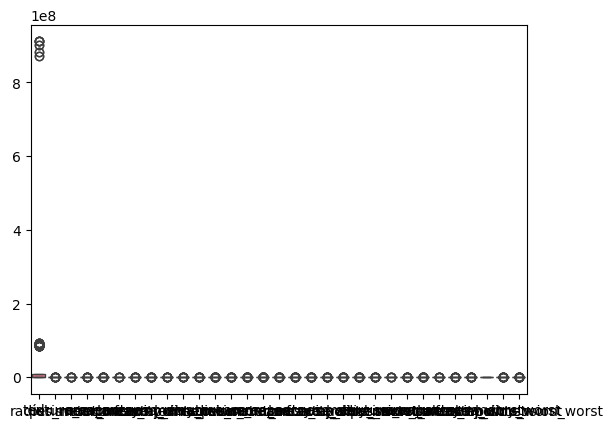

<Figure size 1200x1200 with 0 Axes>

In [7]:
sns.boxplot(df)
plt.figure(figsize=(12,12))
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df['diagnosis'].unique()

array([1, 0])

In [10]:
# ubah object ke 0 (tidak ganas) dan 1 (ganas)

df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

In [22]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].values.reshape(-1, 1)

In [23]:
# stratifieed  split

idx0 = np.where(y==0)[0]
idx1 = np.where(y==1)[0]

np.random.shuffle(idx0)
np.random.shuffle(idx1)

train_0 = int(len(idx0) * 0.8)
train_1 = int(len(idx1) * 0.8)

train_idx = np.concatenate([idx0[:train_0], idx1[:train_1]])
test_idx = np.concatenate([idx0[train_0:], idx1[train_1:]])

X_train = X.iloc[train_idx].values
X_test = X.iloc[test_idx].values
y_train = y.iloc[train_idx].values
y_test = y.iloc[test_idx].values

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [19]:
m, n = X.shape
W = np.zeros((n, 1))
b = 0
learning_rate = 0.01

# Fungsi Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for i in range(2000):
# Forward
    z = np.dot(X, W) + b
    A = sigmoid(z)

    # Loss (binary cross entropy)
    loss = -(1/m) * np.sum(y*np.log(A + 1e-9) + (1-y)*np.log(1-A + 1e-9))

    # Backpropagation
    dW = (1/m) * np.dot(X.T, (A - y))
    db = (1/m) * np.sum(A - y)

    # Update bobot
    W -= learning_rate * dW
    b -= learning_rate * db

    # Tampilkan parameter

    print("W:", W)
    print("b:", b)
    print("Loss akhir:", loss)

    if i % 100 == 0:
        print(f"Iterasi {i}, Loss: {loss:.4f}")

ValueError: Data must be 1-dimensional, got ndarray of shape (569, 569) instead